# Week 8 Markov Simulation Project
Doodl Supermarket

# Objective of the Project

# Imports

In [1]:
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from datetime import datetime, time


# EDA

In [2]:
df = pd.concat(map(lambda f: pd.read_csv(f, delimiter=';'),glob.glob('data/*.csv')))
df.head()

,timestamp,customer_no,location
0,2019-09-06 07:00:00,1,dairy
1,2019-09-06 07:00:00,2,drinks
2,2019-09-06 07:00:00,3,fruit
3,2019-09-06 07:01:00,2,checkout
4,2019-09-06 07:01:00,4,drinks


## Breakdown Timestamp

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y-%m-%d %H:%M:%S")
df['hour']= df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['weekday'] = df['timestamp'].dt.day_name()


## Created unique Customer IDs

In [4]:
def create_unique_customer_id(row):
    return row['timestamp'].dayofyear * 100000 + row['customer_no']

df['customer_id'] = df.apply(lambda row: create_unique_customer_id(row), axis=1)

In [5]:
df = df.drop(['customer_no'], axis = 1)
df

,timestamp,location,hour,minute,weekday,customer_id
0,2019-09-06 07:00:00,dairy,7,0,Friday,24900001
1,2019-09-06 07:00:00,drinks,7,0,Friday,24900002
2,2019-09-06 07:00:00,fruit,7,0,Friday,24900003
3,2019-09-06 07:01:00,checkout,7,1,Friday,24900002
4,2019-09-06 07:01:00,drinks,7,1,Friday,24900004
...,...,...,...,...,...,...
5045,2019-09-04 21:48:00,spices,21,48,Wednesday,24701528
5046,2019-09-04 21:49:00,dairy,21,49,Wednesday,24701520
5047,2019-09-04 21:49:00,dairy,21,49,Wednesday,24701529
5048,2019-09-04 21:49:00,fruit,21,49,Wednesday,24701530


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24877 entries, 0 to 5049
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    24877 non-null  datetime64[ns]
 1   location     24877 non-null  object        
 2   hour         24877 non-null  int64         
 3   minute       24877 non-null  int64         
 4   weekday      24877 non-null  object        
 5   customer_id  24877 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 1.3+ MB


## Calculate the total number of customers in each section and per day of week

In [7]:
df_eda = df.copy()

In [8]:
customers = df_eda.groupby('location')['customer_id'].count().reset_index(name='no. of customers')
customers

,location,no. of customers
0,checkout,7417
1,dairy,4679
2,drinks,3905
3,fruit,5122
4,spices,3754


[Text(0, 0.5, 'No. of Customers'),
 Text(0.5, 0, 'Locations'),
 Text(0.5, 1.0, 'Total Number of Customer in Each Location')]

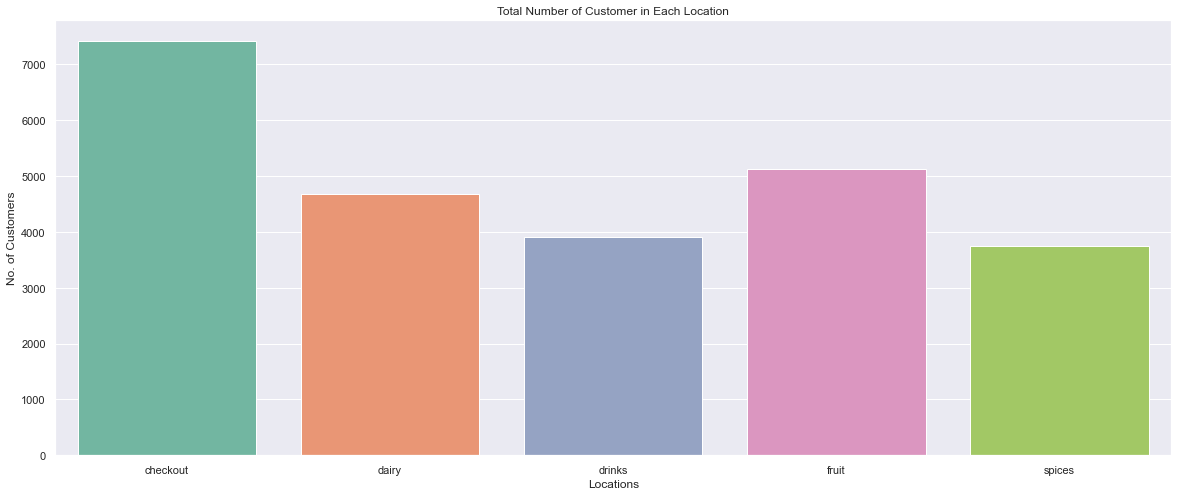

In [9]:
plt.subplots(figsize = [20,8])
ax = sns.barplot(data = customers, x = 'location', y = 'no. of customers', palette = 'Set2')
ax.set(title = 'Total Number of Customer in Each Location', xlabel='Locations', ylabel='No. of Customers')

In [10]:
customers_dow = df_eda.groupby(['location','weekday'])['customer_id'].count().reset_index(name='no. of customers')
customers_dow.head(5)

,location,weekday,no. of customers
0,checkout,Friday,1502
1,checkout,Monday,1437
2,checkout,Thursday,1532
3,checkout,Tuesday,1420
4,checkout,Wednesday,1526


[Text(0, 0.5, 'No. of Customers'),
 Text(0.5, 0, 'Locations'),
 Text(0.5, 1.0, 'Total Number of Customer in Each Location Per DOW')]

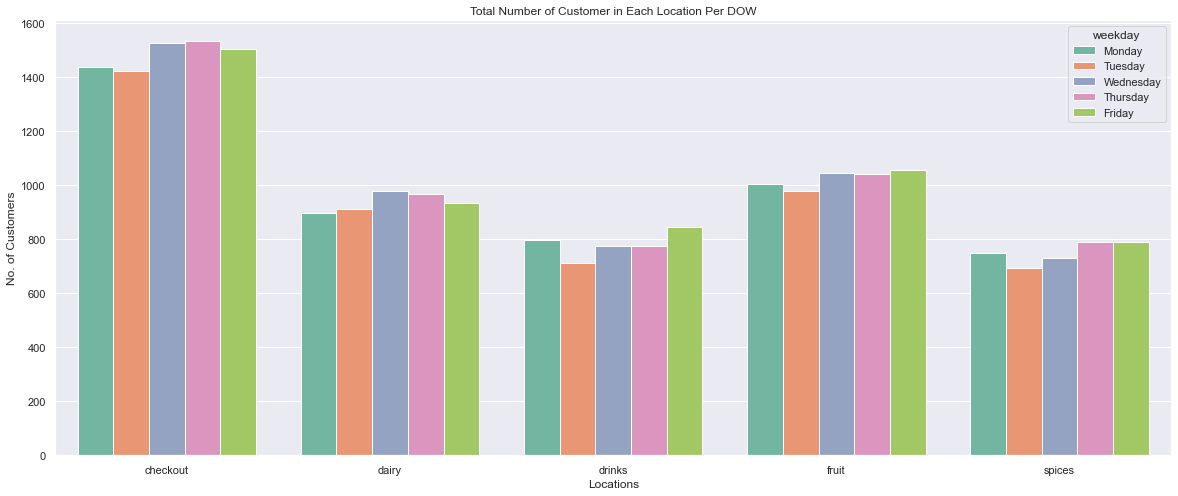

In [11]:
plt.subplots(figsize = [20,8])
ax = sns.barplot(data = customers_dow, x = 'location', y = 'no. of customers', palette = 'Set2', hue = 'weekday',
                hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday'])
ax.set(title = 'Total Number of Customer in Each Location Per DOW', xlabel='Locations', ylabel='No. of Customers')

## Calculate the total number of customers in each location over time

In [12]:
customer_lot = df_eda.groupby(['location','hour', 'weekday'])['customer_id'].count().reset_index(name='no. of customers')
customer_lot.head()

,location,hour,weekday,no. of customers
0,checkout,7,Friday,87
1,checkout,7,Monday,92
2,checkout,7,Thursday,99
3,checkout,7,Tuesday,91
4,checkout,7,Wednesday,85


[Text(0, 0.5, 'No. of Customers'),
 Text(0.5, 0, 'hour'),
 Text(0.5, 1.0, 'Daily Total Number of Customer at Each Location Per Hour')]

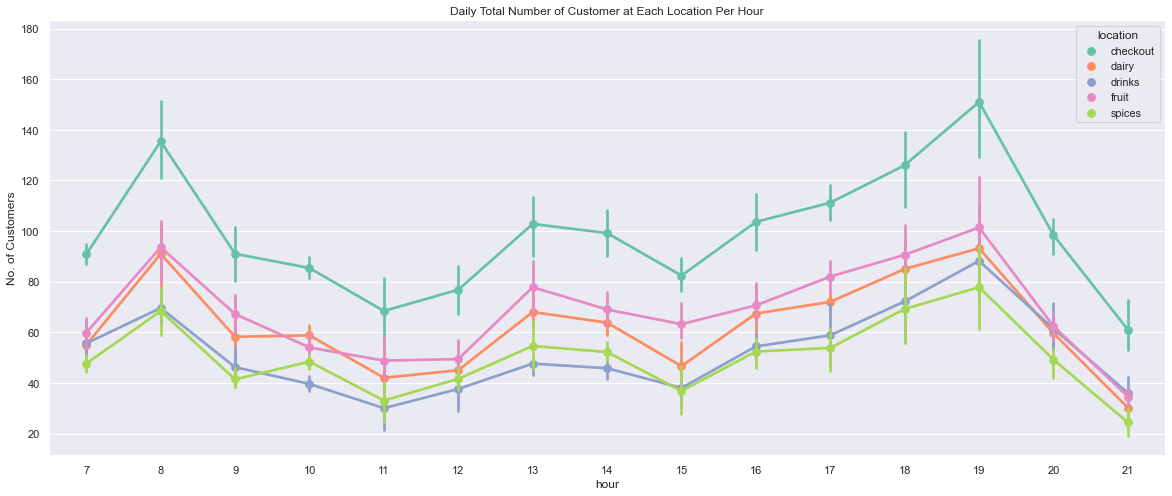

In [13]:
plt.subplots(figsize = [20,8])
ax = sns.pointplot(data = customer_lot, x = 'hour', y = 'no. of customers', palette = 'Set2', hue = 'location')
ax.set(title = 'Daily Total Number of Customer at Each Location Per Hour', xlabel='hour', ylabel='No. of Customers')

## Display the number of customers at checkout over time

In [14]:
customer_checkout = df_eda.groupby(['location','hour', 'weekday'])['customer_id'].count().reset_index(name='no. of customers')
customer_checkout = customer_checkout[customer_checkout.location == 'checkout']
customer_checkout.head(5)

,location,hour,weekday,no. of customers
0,checkout,7,Friday,87
1,checkout,7,Monday,92
2,checkout,7,Thursday,99
3,checkout,7,Tuesday,91
4,checkout,7,Wednesday,85


[Text(0, 0.5, 'No. of Customers'),
 Text(0.5, 0, 'hour'),
 Text(0.5, 1.0, 'Daily Total Number of Customer at Checkout Per Hour')]

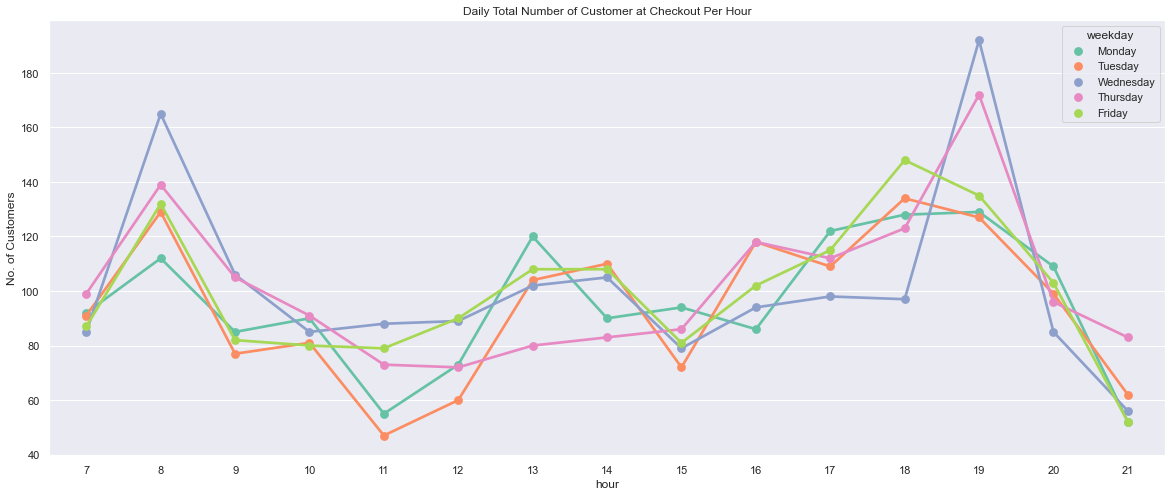

In [15]:
plt.subplots(figsize = [20,8])
ax = sns.pointplot(data = customer_checkout, x = 'hour', y = 'no. of customers', palette = 'Set2', hue = 'weekday',
                  hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday'])
ax.set(title = 'Daily Total Number of Customer at Checkout Per Hour', xlabel='hour', ylabel='No. of Customers')

## Calculate the time duration each customer spend in the market

In [16]:
time_in = df_eda.groupby(['customer_id', 'weekday'])['timestamp'].min() 
time_out = df_eda.groupby(['customer_id', 'weekday'])['timestamp'].max()

duration = (time_out - time_in).dt.seconds.reset_index(name = 'duration in seconds')
duration

,customer_id,weekday,duration in seconds
0,24500001,Monday,120
1,24500002,Monday,180
2,24500003,Monday,120
3,24500004,Monday,240
4,24500005,Monday,60
...,...,...,...
7440,24901506,Friday,0
7441,24901507,Friday,120
7442,24901508,Friday,120
7443,24901509,Friday,0


 ## Calculate the time duration each customer spent in every location

In [17]:
duration_loc = df_eda.groupby(['customer_id', 'timestamp', 'location']).all().reset_index()

duration_loc['spenttime'] = duration_loc.groupby('customer_id')['timestamp'].diff().shift(-1)
dummies=pd.get_dummies(duration_loc.location)
dummies.values[dummies!=0]=duration_loc.spenttime.dt.total_seconds()/60
duration_loc = duration_loc.join(dummies)
duration_loc = duration_loc.drop(['hour','minute','weekday','timestamp','location','spenttime'], axis=1)
duration_loc = duration_loc.groupby('customer_id').sum()
customer_dur = duration_loc 
customer_dur.head(10)

,checkout,dairy,drinks,fruit,spices
customer_id,,,,,
24500001,0,2,0,0,0
24500002,0,3,0,0,0
24500003,0,2,0,0,0
24500004,0,4,0,0,0
24500005,0,0,0,0,1
24500006,0,13,7,0,5
24500007,0,0,4,2,3
24500008,0,0,0,3,0
24500009,0,6,0,1,0


## Calculate the total number of customers in the supermarket over time.

In [18]:
customer_hourly = df_eda.groupby(['hour', 'weekday'])['customer_id'].count().reset_index(name='no. of customers')
customer_hourly.head(10)

,hour,weekday,no. of customers
0,7,Friday,305
1,7,Monday,317
2,7,Thursday,315
3,7,Tuesday,328
4,7,Wednesday,279
5,8,Friday,469
6,8,Monday,364
7,8,Thursday,447
8,8,Tuesday,463
9,8,Wednesday,547


[Text(0, 0.5, 'No. of Customers'),
 Text(0.5, 0, 'hour'),
 Text(0.5, 1.0, 'Daily Total Number of Customer in the Supermarket Per Hour')]

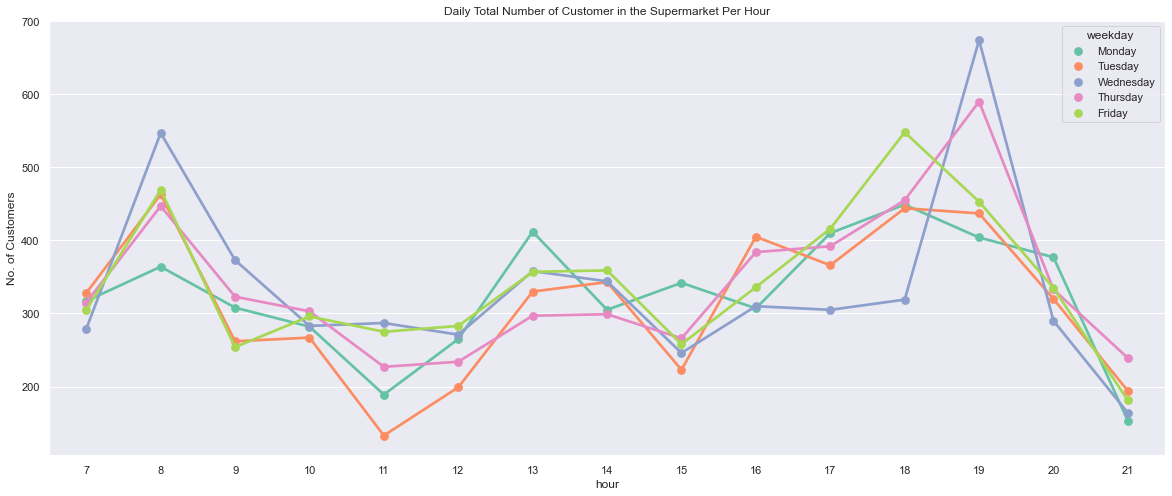

In [19]:
plt.subplots(figsize = [20,8])
ax = sns.pointplot(data = customer_hourly, x = 'hour', y = 'no. of customers', palette = 'Set2', hue = 'weekday',
                  hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday'])
ax.set(title = 'Daily Total Number of Customer in the Supermarket Per Hour', xlabel='hour', ylabel='No. of Customers')

## Estimated total revenue per minute for each location


In [20]:
revenue_per_minute = df_eda.groupby(['timestamp','location']).all().reset_index()
revenue_per_minute = revenue_per_minute.drop(['hour','minute','weekday','customer_id'], axis=1)
revenue_per_minute['revenue'] = revenue_per_minute['location'].map({'dairy': 5, 'fruit': 4, 'spices': 3, 'drinks': 6})
revenue_per_minute = revenue_per_minute.dropna()
revenue_per_minute = revenue_per_minute.groupby(['timestamp','location']).sum()
revenue_per_minute

revenue
timestamp           location         
2019-09-02 07:03:00 dairy         5.0
2019-09-02 07:04:00 dairy         5.0
                    fruit         4.0
                    spices        3.0
2019-09-02 07:05:00 dairy         5.0
...                               ...
2019-09-06 21:49:00 spices        3.0
2019-09-06 21:50:00 dairy         5.0
                    drinks        6.0
                    fruit         4.0
                    spices        3.0

[10379 rows x 1 columns]

In [21]:
revenue_total_loc = revenue_per_minute.groupby(['location']).sum()
revenue_total_loc

,revenue
location,
dairy,13405.0
drinks,14874.0
fruit,11296.0
spices,7185.0


# Transition Probability Matrix

In [22]:
df_eda.head(5)

,timestamp,location,hour,minute,weekday,customer_id
0,2019-09-06 07:00:00,dairy,7,0,Friday,24900001
1,2019-09-06 07:00:00,drinks,7,0,Friday,24900002
2,2019-09-06 07:00:00,fruit,7,0,Friday,24900003
3,2019-09-06 07:01:00,checkout,7,1,Friday,24900002
4,2019-09-06 07:01:00,drinks,7,1,Friday,24900004


In [23]:
trans = df_eda.groupby(['customer_id', 'timestamp', 'location']).all().reset_index()
trans['after'] = trans.groupby('customer_id')['location'].shift(-1)
trans = trans.rename(columns={'location':'before'})
trans = trans.drop(['customer_id','timestamp','hour','minute','weekday'], axis=1)
trans = trans.fillna('checkout')
trans.head(5)

,before,after
0,dairy,checkout
1,checkout,checkout
2,dairy,checkout
3,checkout,checkout
4,dairy,checkout


In [24]:
matrix = pd.crosstab(trans['before'], trans['after'], normalize=0)
matrix

after,checkout,dairy,drinks,fruit,spices
before,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.393033,0.000000,0.222483,0.189357,0.195127
drinks,0.537260,0.027145,0.000000,0.218950,0.216645
fruit,0.500195,0.237993,0.136080,0.000000,0.125732
spices,0.251998,0.323122,0.272776,0.152104,0.000000


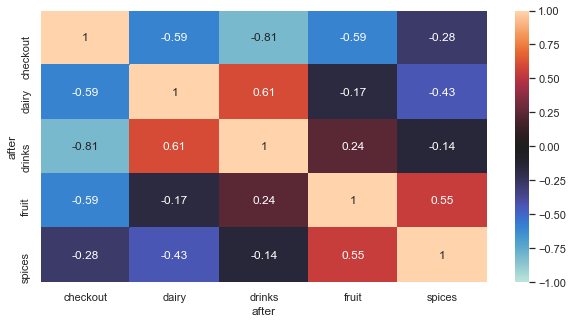

In [25]:
plt.figure(figsize = [10,5])

sns.heatmap(matrix.corr(), annot = True, vmin=-1, vmax=1, center= 0)

# Markov Simulations

In [26]:
P = matrix.values
P

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.3930327 , 0.        , 0.22248344, 0.1893567 , 0.19512716],
       [0.53725992, 0.02714469, 0.        , 0.21895006, 0.21664533],
       [0.50019524, 0.23799297, 0.13607966, 0.        , 0.12573214],
       [0.25199787, 0.323122  , 0.27277571, 0.15210442, 0.        ]])

## Initial State

In [27]:
vector_0 = np.array([0, 0.5, 0.25, 0.25, 0])
vector_0

array([0.  , 0.5 , 0.25, 0.25, 0.  ])

In [28]:
vector_1 = np.dot(vector_0, P)
vector_1

array([0.45588014, 0.06628441, 0.14526163, 0.14941587, 0.18315795])

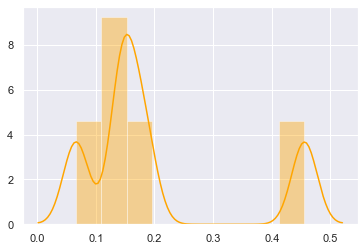

In [29]:
sns.distplot(vector_1, color='orange' )

In [30]:
vector_2 = np.dot(vector_1, P)
vector_2

array([0.68086785, 0.09868537, 0.08504068, 0.07221558, 0.06319052])

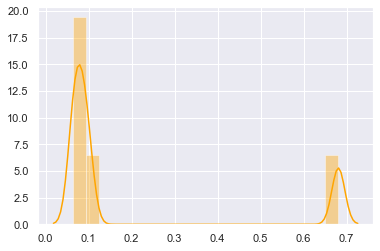

In [31]:
sns.distplot(vector_2, color='orange' )

## Vector Chains

In [32]:
vector = vector_0
print(vector)
vector_n = 10

[0.   0.5  0.25 0.25 0.  ]


In [33]:
new_vector = np.dot(vector_0, P)
new_vector_list = []

for i in range(vector_n):
    new_vector = np.dot(new_vector, P)
    new_vector_list.append(new_vector)
                  
print(new_vector_list)

[array([0.68086785, 0.09868537, 0.08504068, 0.07221558, 0.06319052]), array([0.81738914, 0.03991345, 0.04901977, 0.04691796, 0.04675968]), array([0.89466427, 0.02760585, 0.02801957, 0.02540312, 0.0243072 ]), array([0.93939994, 0.01466054, 0.0162291 , 0.01505947, 0.01465095]), array([0.96510594, 0.00875863, 0.00930744, 0.00855791, 0.00827009]), array([0.97991355, 0.00496162, 0.00536909, 0.00495429, 0.00480146]), array([0.98843629, 0.00287629, 0.00308778, 0.0028454 , 0.00275425]), array([0.99334302, 0.00165096, 0.00177842, 0.00163965, 0.00158795]), array([9.96167681e-01, 9.51601136e-04, 1.02358844e-03, 9.43539674e-04,
       9.13589326e-04]), array([9.97793801e-01, 5.47541611e-04, 5.89317019e-04, 5.43267781e-04,
       5.26072140e-04])]


# Supermarket Simulation

In [34]:
df_sim = df_eda.reset_index()
df_sim

,index,timestamp,location,hour,minute,weekday,customer_id
0,0,2019-09-06 07:00:00,dairy,7,0,Friday,24900001
1,1,2019-09-06 07:00:00,drinks,7,0,Friday,24900002
2,2,2019-09-06 07:00:00,fruit,7,0,Friday,24900003
3,3,2019-09-06 07:01:00,checkout,7,1,Friday,24900002
4,4,2019-09-06 07:01:00,drinks,7,1,Friday,24900004
...,...,...,...,...,...,...,...
24872,5045,2019-09-04 21:48:00,spices,21,48,Wednesday,24701528
24873,5046,2019-09-04 21:49:00,dairy,21,49,Wednesday,24701520
24874,5047,2019-09-04 21:49:00,dairy,21,49,Wednesday,24701529
24875,5048,2019-09-04 21:49:00,fruit,21,49,Wednesday,24701530


In [35]:
class Customer:
    def __init__(self, id, state, t_mat):
        self.id = id
        self.state = state
        self.t_mat = t_mat
        self.checkout_visits = 0
        self.a = t_mat.columns.values.tolist()
        
    def __repr__(self):
        return f'{self.id} is in {self.state}'
    
    def is_active(self):
        return self.checkout_visits < 2
    
    def next_state(self):
        p = self.t_mat.loc[self.state].to_list()
        self.state = np.random.choice(self.a, p=p)
        if (self.state) == 'checkout':
            self.checkout_visits = self.checkout_visits + 1


In [36]:
matrix.loc['dairy'].to_list()

[0.3930326992947211,
 0.0,
 0.22248343663175893,
 0.18935670014960462,
 0.19512716392391535]

In [37]:
c1 = Customer(df_sim.at[0,'customer_id'], df_sim.at[0,'location'], matrix)
print(c1)

24900001 is in dairy


In [38]:
while c1.is_active():
    c1.next_state()
    print(c1)

24900001 is in fruit
24900001 is in dairy
24900001 is in spices
24900001 is in dairy
24900001 is in drinks
24900001 is in checkout
24900001 is in checkout


In [39]:

class Supermarket:
    def __init__(self, customers):
        self.customers = customers
        self.time = time (8,0)
        self.df = pd.DataFrame(columns=['time','customer_id','location'])
        for c in self.customers:
            self.df = self.df.append({'time':self.time,'customer_id':c.id,'location':c.state}, ignore_index=True)

        
    def get_time(self):
        return self.time
    
    def next_minute(self):
        self.time = time(self.time.hour, self.time.minute +1 )
        for c in self.customers:
            c.next_state()
            self.df = self.df.append({'time':self.time,'customer_id':c.id,'location':c.state}, ignore_index=True)
        
    def print_customers(self):
        print(self.df)
        print('----------')
        
    def is_active(self):
        for c in self.customers:
            if (c.is_active()):
                return True
        self.df.to_csv('supermarketadventure.csv',index=False)
        return False
    
    def __repr__(self):
        self.print_customers()
        return f'{len(self.customers)} customers running around at {self.time}'

In [40]:
df_sim2 = df_sim.groupby(['customer_id',]).first().reset_index()

customers = []
for i in range(0,14):
    customers.append(Customer(df_sim2.at[i,'customer_id'], df_sim2.at[i,'location'], matrix))
customers

[24500001 is in dairy,
 24500002 is in dairy,
 24500003 is in dairy,
 24500004 is in dairy,
 24500005 is in spices,
 24500006 is in spices,
 24500007 is in spices,
 24500008 is in fruit,
 24500009 is in dairy,
 24500010 is in fruit,
 24500011 is in drinks,
 24500012 is in spices,
 24500013 is in dairy,
 24500014 is in fruit]

In [41]:
supermarket_adventures = Supermarket(customers)
print(supermarket_adventures)
while supermarket_adventures.is_active():
    supermarket_adventures.next_minute()
    print(supermarket_adventures)

        time customer_id location
0   08:00:00    24500001    dairy
1   08:00:00    24500002    dairy
2   08:00:00    24500003    dairy
3   08:00:00    24500004    dairy
4   08:00:00    24500005   spices
5   08:00:00    24500006   spices
6   08:00:00    24500007   spices
7   08:00:00    24500008    fruit
8   08:00:00    24500009    dairy
9   08:00:00    24500010    fruit
10  08:00:00    24500011   drinks
11  08:00:00    24500012   spices
12  08:00:00    24500013    dairy
13  08:00:00    24500014    fruit
----------
14 customers running around at 08:00:00
        time customer_id  location
0   08:00:00    24500001     dairy
1   08:00:00    24500002     dairy
2   08:00:00    24500003     dairy
3   08:00:00    24500004     dairy
4   08:00:00    24500005    spices
5   08:00:00    24500006    spices
6   08:00:00    24500007    spices
7   08:00:00    24500008     fruit
8   08:00:00    24500009     dairy
9   08:00:00    24500010     fruit
10  08:00:00    24500011    drinks
11  08:00:00    245